<a href="https://colab.research.google.com/github/vanquoc12/20146406-vanquoc-24022023/blob/main/24_02_20146406_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 42.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=71b55f595d05f86b4216bfea3bfa79c6177c1cb066d0812cd62742cd87b69ec7
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


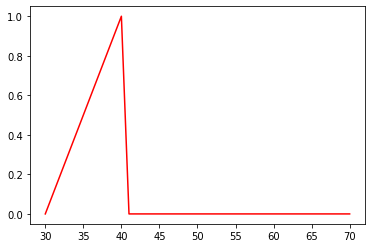

In [ ]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
x= np.arange(30,71,1)
slow=fuzzy.trimf(x,[30,40,40])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5, label='SLOW')



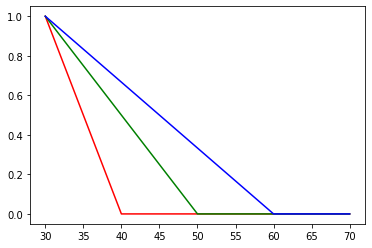

In [ ]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
x= np.arange(30,71,1)
slow=fuzzy.trimf(x,[30,30,40])
medium=fuzzy.trimf(x,[30,30,50])
medium_fast=fuzzy.trimf(x,[30,30,60])

plt.figure()
plt.plot(x,slow,'r',linewidth=1.5, label='SLOW')
plt.plot(x,medium,'g',linewidth=1.5, label='MEDIUM')
plt.plot(x,medium_fast,'b',linewidth=1.5, label='MEDIUM_FAST')



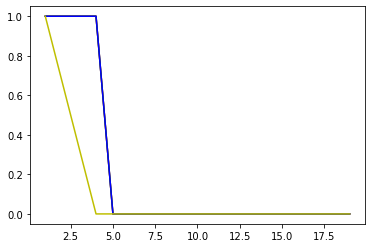

In [ ]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
x= np.arange(1,20,1)
slow=fuzzy.trapmf(x,[1,1,4,5])
medium=fuzzy.trapmf(x,[0,1,4,5])
medium_fast=fuzzy.trapmf(x,[0,0,4,5])
full_speed=fuzzy.trapmf(x,[0,0,1,4])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5, label='SLOW')
plt.plot(x,medium,'g',linewidth=1.5, label='MEDIUM')
plt.plot(x,medium_fast,'b',linewidth=1.5, label='MEDIUM_FAST')
plt.plot(x,full_speed,'y',linewidth=1.5, label='FULL_SPEED')

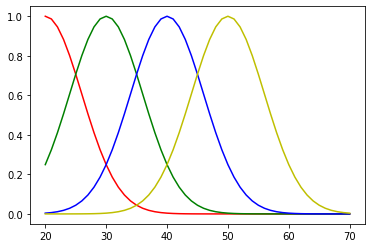

In [ ]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
x= np.arange(20,71,1)
slow=fuzzy.gaussmf(x,20,6)
medium=fuzzy.gaussmf(x,30,6)
medium_fast=fuzzy.gaussmf(x,40,6)
full_speed=fuzzy.gaussmf(x,50,6)
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5, label='SLOW')
plt.plot(x,medium,'g',linewidth=1.5, label='MEDIUM')
plt.plot(x,medium_fast,'b',linewidth=1.5, label='MEDIUM_FAST')
plt.plot(x,full_speed,'y',linewidth=1.5, label='FULL_SPEED')

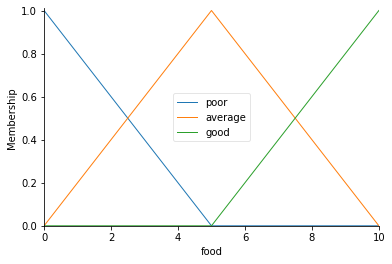

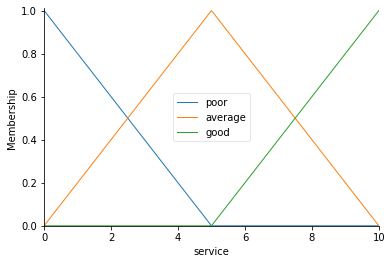

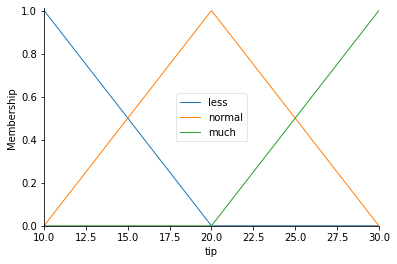

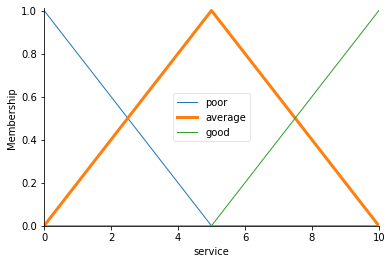

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip=ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['normal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])
food.view()
service.view()
tip.view()
service['average'].view()

In [8]:
rule1=ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2=ctrl.Rule(food['poor'] & service['average'], tip['normal'])
rule3=ctrl.Rule(food['poor'] & service['good'], tip['normal'])

rule4=ctrl.Rule(food['average'] & service['poor'],tip['less'])
rule5=ctrl.Rule(food['average'] & service['average'],tip['normal'])
rule6=ctrl.Rule(food['average'] & service['good'],tip['much'])

rule7=ctrl.Rule(food['good'] & service['poor'],tip['less'])
rule8=ctrl.Rule(food['good'] & service['average'],tip['much'])
rule9=ctrl.Rule(food['good'] & service['good'],tip['much'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6.5
tipping.input['service']=9.8
tipping.compute()
print(tipping.output['tip'])

tip.view(sim=tipping)

NameError: ignored

73.93377001455603


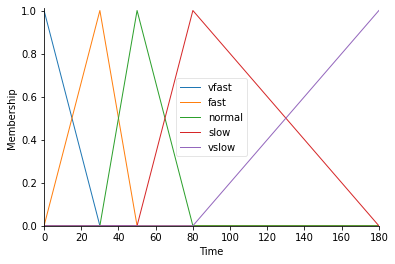

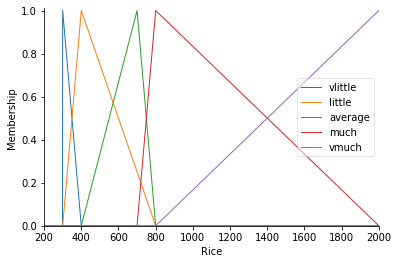

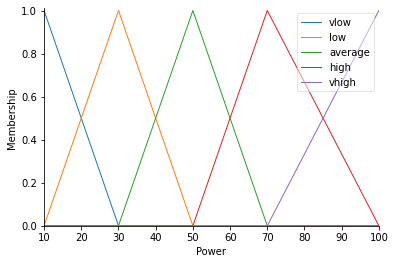

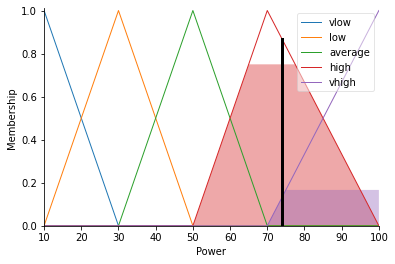

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(0,181,1),'Time')
rice = ctrl.Antecedent(np.arange(200,2001,1),'Rice')
power = ctrl.Consequent(np.arange(10,101,1),'Power')

time['vfast']= fuzz.trimf(time.universe,[0,0,30])
time['fast'] = fuzz.trimf(time.universe, [0,30,50])
time['normal']= fuzz.trimf(time.universe, [30,50,80])
time['slow']= fuzz.trimf(time.universe, [50,80,180])
time['vslow']= fuzz.trimf(time.universe, [80,180,180])

rice['vlittle']= fuzz.trimf(rice.universe,[300,300,400])
rice['little'] = fuzz.trimf(rice.universe, [300,400,800])
rice['average']= fuzz.trimf(rice.universe, [400,700,800])
rice['much']= fuzz.trimf(rice.universe, [700,800,2000])
rice['vmuch']= fuzz.trimf(rice.universe,[800,2000,2000])

power['vlow'] = fuzz.trimf(power.universe, [10,10,30])
power['low'] = fuzz.trimf(power.universe,[10,30,50])
power['average'] = fuzz.trimf(power.universe,[30,50,70])
power['high'] = fuzz.trimf(power.universe,[50,70,100])
power['vhigh'] = fuzz.trimf(power.universe,[70,100,100])
time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['vfast'] & rice['vlittle'], power['high'])
rule2 = ctrl.Rule(time['vfast'] & rice['little'], power['high'])
rule3 = ctrl.Rule(time['vfast'] & rice['average'], power['vhigh'])
rule4 = ctrl.Rule(time['vfast'] & rice['much'], power['vhigh'])
rule5 = ctrl.Rule(time['vfast'] & rice['vmuch'], power['vhigh'])

rule6 = ctrl.Rule(time['fast'] & rice['vlittle'], power['high'])
rule7 = ctrl.Rule(time['fast'] & rice['little'], power['high'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['high'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['vhigh'])
rule10 = ctrl.Rule(time['fast'] & rice['vmuch'],power['vhigh'])

rule11 = ctrl.Rule(time['normal'] & rice['vlittle'], power['vlow'])
rule12 = ctrl.Rule(time['normal'] & rice['little'], power['low'])
rule13 = ctrl.Rule(time['normal'] & rice['average'], power['average'])
rule14 = ctrl.Rule(time['normal'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['normal'] & rice['vmuch'], power['vhigh'])
                   
rule16 = ctrl.Rule(time['slow'] & rice['vlittle'], power['low'])
rule17 = ctrl.Rule(time['slow'] & rice['little'], power['low'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['vlow'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['vlow'])
rule20 = ctrl.Rule(time['slow'] & rice['vmuch'], power['vlow'])

rule21 = ctrl.Rule(time['vslow'] & rice['vlittle'], power['vlow'])
rule22 = ctrl.Rule(time['vslow'] & rice['little'], power['vlow'])
rule23 = ctrl.Rule(time['vslow'] & rice['average'], power['vlow'])
rule24 = ctrl.Rule(time['vslow'] & rice['much'], power['vlow'])
rule25 = ctrl.Rule(time['vslow'] & rice['vmuch'], power['vlow'])

ielts_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
ielts = ctrl.ControlSystemSimulation(ielts_ctrl)
ielts.input['Time'] = 25
ielts.input['Rice'] = 500
ielts.compute()
print(ielts.output['Power'])
power.view(sim = ielts)